# Phase 4 Code Challenge Review

# Tensor Flow Details

In [33]:
conda activate TFgpu


Note: you may need to restart the kernel to use updated packages.


In [34]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [35]:
# pip cache purge

In [36]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Create a simple TensorFlow computation graph
a = tf.constant(3.0)
b = tf.constant(4.0)
c = tf.add(a, b)

# Execute the computation graph
result = c.numpy()

# Print the result
print("Result:", result)

TensorFlow version: 2.10.0
Result: 7.0


# Load Python Packages & DF

In [37]:
# Basic Imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import string
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from afinn import Afinn
from nltk.corpus import sentiwordnet as swn

In [38]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

In [39]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [40]:
# df.drop(df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell") |
#            (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product')].index, inplace=True)

In [41]:
df.drop(df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell") ].index, inplace=True)

In [42]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [43]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(normalize=True)

No emotion toward brand or product    0.602999
Positive emotion                      0.333221
Negative emotion                      0.063780
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

# Clean Data

In [12]:
# # Step 1: Tokenization
# def tokenize_text(text):
#     tokens = word_tokenize(text)
#     return tokens

# # Step 2: Stopword Removal
# def remove_stopwords(tokens):
#     stop_words = set(stopwords.words('english'))
#     filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
#     return filtered_tokens

# # Step 3: Lemmatization
# def lemmatize_tokens(tokens):
#     lemmatizer = WordNetLemmatizer()
#     lemmas = [lemmatizer.lemmatize(token) for token in tokens]
#     return lemmas

# # Step 4: Remove odd special characters via RegExr
# def clean_tokens(text):
#     cleaned_text = re.sub(r'[^a-zA-Z0-9\s#@]', '', text)
#     return cleaned_text

# # Apply preprocessing steps to the 'tweet' column
# df['tweet_text'] = df['tweet_text'].astype(str)
# df['tokenized_tweet'] = df['tweet_text'].apply(clean_tokens)
# df['tokenized_tweet'] = df['tokenized_tweet'].apply(tokenize_text)
# df['tokenized_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
# df['tokenized_tweet'] = df['tokenized_tweet'].apply(lemmatize_tokens)

In [44]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [45]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove mentions and URLs
    text = re.sub(r'@\w+', 'USER', text)
    text = re.sub(r'http\S+|www\S+', 'URL', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Apply preprocessing steps to the 'tweet_text' column
df['tweet_text'] = df['tweet_text'].astype(str)
df['tokenized_tweet'] = df['tweet_text'].apply(clean_text)

In [46]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tokenized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[USER, 3g, iphone, 3, hr, tweeting, riseaustin..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[USER, know, USER, awesome, ipadiphone, app, y..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[USER, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[USER, hope, year, festival, isnt, crashy, yea..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[USER, great, stuff, fri, sxsw, marissa, mayer..."
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,"[ipad, everywhere, sxsw, link]"
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,"[wave, buzz, rt, USER, interrupt, regularly, s..."
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,"[google, zeiger, physician, never, reported, p..."
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,"[verizon, iphone, customer, complained, time, ..."


# Review Top Tokens

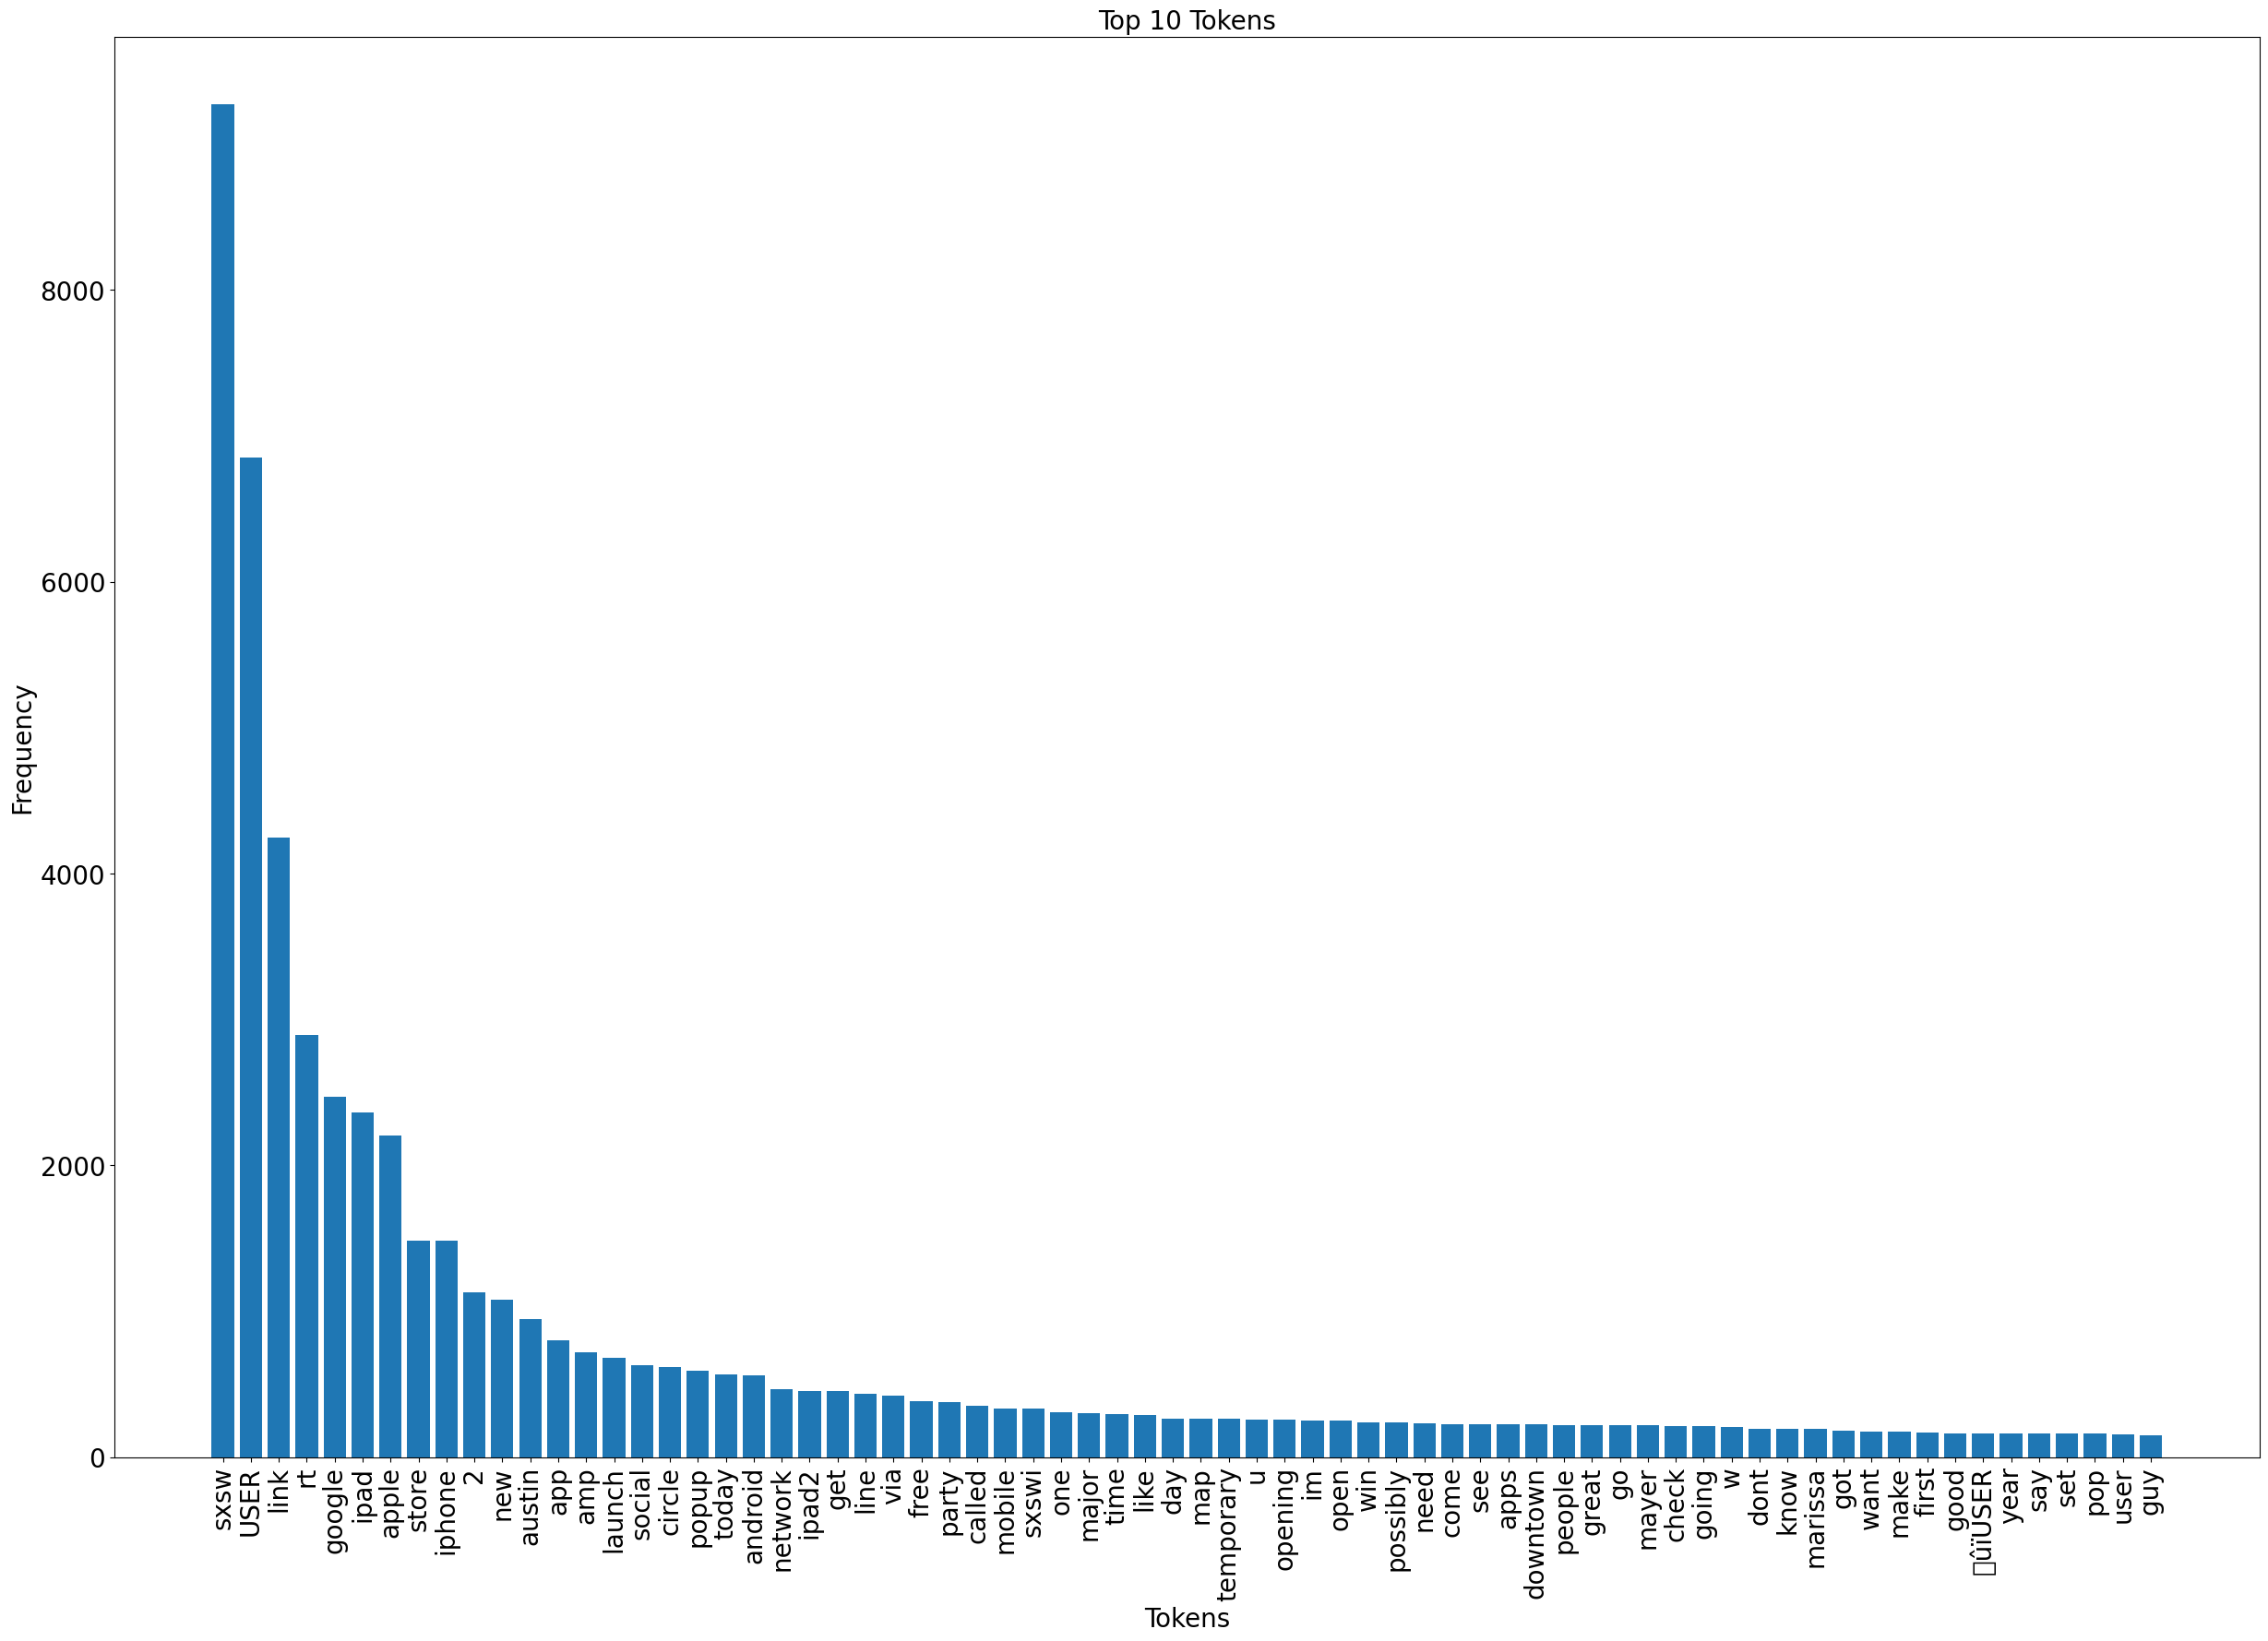

In [50]:
all_tokens = [token for tokens in df['tokenized_tweet'] for token in tokens]
freq_dist = FreqDist(all_tokens)

# Get the top 10 most common tokens
top_tokens = freq_dist.most_common(70)

# Extract the tokens and frequencies
tokens = [token for token, _ in top_tokens]
frequencies = [freq for _, freq in top_tokens]

# Create a bar chart
plt.figure(figsize=(30, 20))
plt.bar(tokens, frequencies)
plt.xlabel('Tokens', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Top 10 Tokens', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Sentiment Analysis

In [51]:
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Create an instance of the SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

# # Step 5: Sentiment Analysis
# def get_sentiment_score(tokens):
#     sentiment_scores = []
#     for token in tokens:
#         sentiment_scores.append(sia.polarity_scores(token)['compound'])
#     return sentiment_scores

# # Apply sentiment analysis to the 'tokenized_tweet' column
# df['sentiment_scores'] = df['tokenized_tweet'].apply(get_sentiment_score)

In [52]:
# df['sentiment_scores']

# Feature Engineering

In [53]:
# # Word Frequency
# def calculate_word_frequency(tokens):
#     word_frequency = Counter(tokens)
#     return word_frequency

# # Character Count
# def calculate_character_count(text):
#     return len(text)

# # Hashtags and Mentions
# def extract_hashtags_mentions(text):
#     hashtags = re.findall(r'#(\w+)', text)
#     mentions = re.findall(r'@(\w+)', text)
#     return hashtags, mentions

# # Sentiment Lexicon (AFINN-111)
# sentiment_lexicon = {
#     'awesome': 2,
#     'good': 1,
#     'bad': -1,
#     'terrible': -2
# }

# # Assign Sentiment Scores
# def assign_sentiment_scores(tokens):
#     sentiment_scores = []
#     for token in tokens:
#         if token in sentiment_lexicon:
#             sentiment_scores.append(sentiment_lexicon[token])
#         else:
#             sentiment_scores.append(0)  # Assign 0 if word not found in the lexicon
#     return sentiment_scores

# # Apply feature engineering steps
# df['word_frequency'] = df['tokenized_tweet'].apply(calculate_word_frequency)
# df['character_count'] = df['tweet_text'].apply(calculate_character_count)
# df['hashtags'], df['mentions'] = zip(*df['tweet_text'].apply(extract_hashtags_mentions))
# df['sentiment_scores'] = df['tokenized_tweet'].apply(assign_sentiment_scores)

In [54]:
# Word Frequency
def calculate_word_frequency(tokens):
    word_frequency = Counter(tokens)
    return word_frequency

# Character Count
def calculate_character_count(text):
    return len(text)

# Hashtags and Mentions
def extract_hashtags_mentions(text):
    hashtags = re.findall(r'#(\w+)', text)
    mentions = re.findall(r'@(\w+)', text)
    return hashtags, mentions

# Sentiment Lexicon (AFINN-111)
sentiment_lexicon = {
    'awesome': 2,
    'good': 1,
    'bad': -1,
    'terrible': -2
}

# Expand sentiment lexicon using AFINN-165
afinn_lexicon = {
    'awesome': 2,
    'good': 1,
    'bad': -1,
    'terrible': -2,
    # Add more words and sentiment scores here
}

sentiment_lexicon.update(afinn_lexicon)

def get_sentiment_score(word):
    synsets = list(swn.senti_synsets(word))
    if synsets:
        sentiment_score = (synsets[0].pos_score() - synsets[0].neg_score())
        return sentiment_score
    return 0

additional_words = ['happy', 'sad', 'exciting', 'frustrating']
for word in additional_words:
    sentiment_score = get_sentiment_score(word)
    sentiment_lexicon[word] = sentiment_score

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment_score(word):
    scores = sia.polarity_scores(word)
    sentiment_score = scores['compound']
    return sentiment_score

vader_lexicon = {
    'awesome': 2,
    'good': 1,
    'bad': -1,
    'terrible': -2
}

for word, score in vader_lexicon.items():
    sentiment_lexicon[word] = score

# Assign Sentiment Scores
def assign_sentiment_scores(tokens):
    sentiment_scores = []
    for token in tokens:
        if token in sentiment_lexicon:
            sentiment_scores.append(sentiment_lexicon[token])
        else:
            sentiment_scores.append(0)  # Assign 0 if word not found in the lexicon
    return sentiment_scores

# Apply feature engineering steps
df['tweet_text'] = df['tweet_text'].astype(str)
df['tokenized_tweet'] = df['tweet_text'].apply(clean_text)
df['word_frequency'] = df['tokenized_tweet'].apply(calculate_word_frequency)
df['character_count'] = df['tweet_text'].apply(calculate_character_count)
df['hashtags'], df['mentions'] = zip(*df['tweet_text'].apply(extract_hashtags_mentions))
df['sentiment_scores'] = df['tokenized_tweet'].apply(assign_sentiment_scores)

In [55]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tokenized_tweet,word_frequency,character_count,hashtags,mentions,sentiment_scores
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[USER, 3g, iphone, 3, hr, tweeting, riseaustin...","{'USER': 1, '3g': 1, 'iphone': 1, '3': 1, 'hr'...",127,"[RISE_Austin, SXSW]",[wesley83],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[USER, know, USER, awesome, ipadiphone, app, y...","{'USER': 2, 'know': 1, 'awesome': 1, 'ipadipho...",139,[SXSW],"[jessedee, fludapp]","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[USER, wait, ipad, 2, also, sale, sxsw]","{'USER': 1, 'wait': 1, 'ipad': 1, '2': 1, 'als...",79,"[iPad, SXSW]",[swonderlin],"[0, 0, 0, 0, 0, 0, 0]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[USER, hope, year, festival, isnt, crashy, yea...","{'USER': 1, 'hope': 1, 'year': 2, 'festival': ...",82,[sxsw],[sxsw],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[USER, great, stuff, fri, sxsw, marissa, mayer...","{'USER': 1, 'great': 1, 'stuff': 1, 'fri': 1, ...",131,[SXSW],[sxtxstate],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,"[ipad, everywhere, sxsw, link]","{'ipad': 1, 'everywhere': 1, 'sxsw': 1, 'link'...",29,[SXSW],[],"[0, 0, 0, 0]"
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,"[wave, buzz, rt, USER, interrupt, regularly, s...","{'wave': 1, 'buzz': 1, 'rt': 1, 'USER': 1, 'in...",125,"[sxsw, google, circles]",[mention],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,"[google, zeiger, physician, never, reported, p...","{'google': 1, 'zeiger': 1, 'physician': 2, 'ne...",145,"[sxsw, health2dev]",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,"[verizon, iphone, customer, complained, time, ...","{'verizon': 1, 'iphone': 1, 'customer': 1, 'co...",140,[SXSW],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


C:\Users\bobev\anaconda3\envs\tfgpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


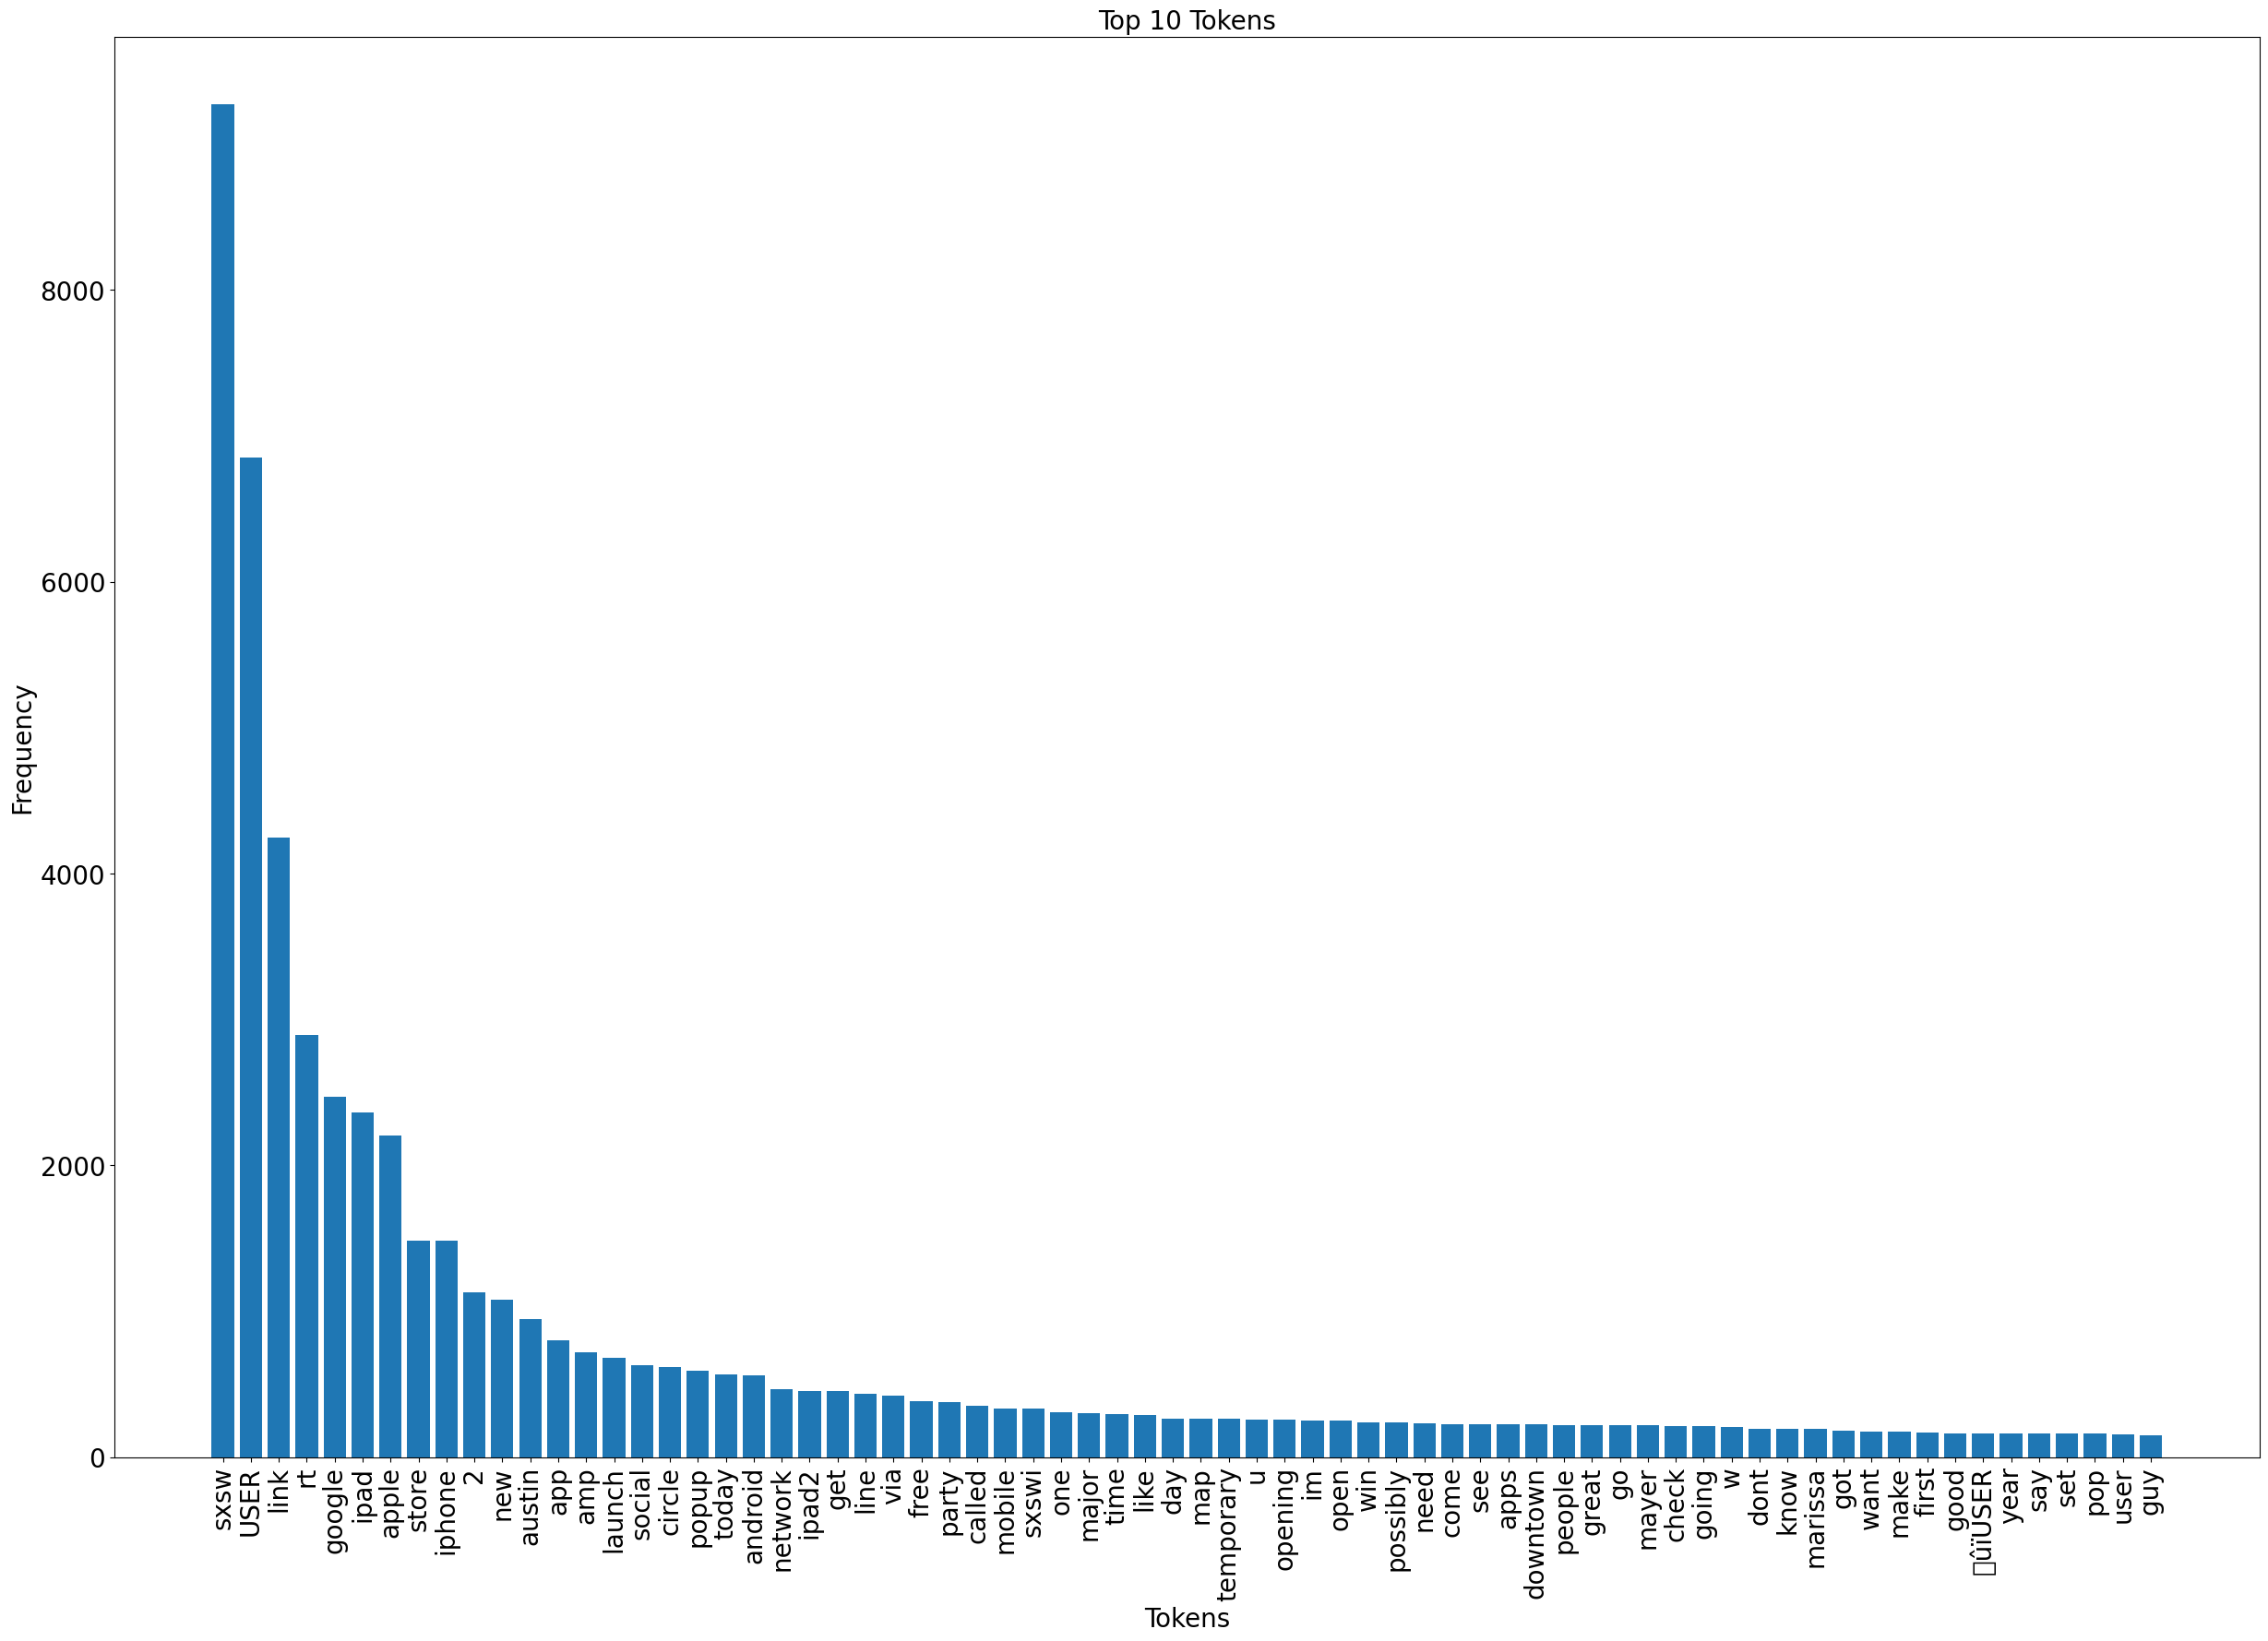

In [61]:
all_tokens = [token for tokens in df['tokenized_tweet'] for token in tokens]
freq_dist = FreqDist(all_tokens)

# Get the top 10 most common tokens
top_tokens = freq_dist.most_common(70)

# Extract the tokens and frequencies
tokens = [token for token, _ in top_tokens]
frequencies = [freq for _, freq in top_tokens]

# Create a bar chart
plt.figure(figsize=(30, 20))
plt.bar(tokens, frequencies)
plt.xlabel('Tokens', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Top 10 Tokens', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

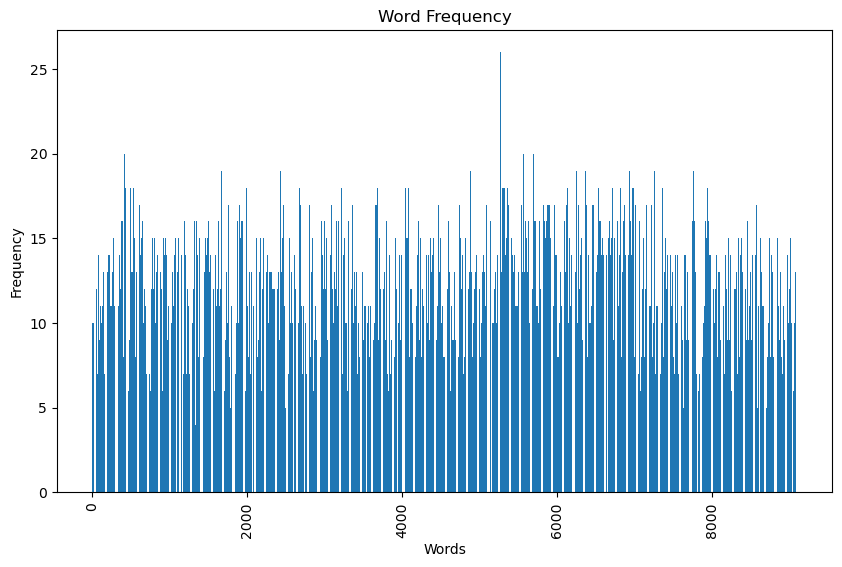

In [56]:
# Word Frequency
word_frequency = df['word_frequency']
word_counts = word_frequency.apply(lambda x: sum(x.values()))
word_labels = list(word_counts.index)
word_values = list(word_counts.values)

plt.figure(figsize=(10, 6))
plt.bar(word_labels, word_values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=90)
plt.show()

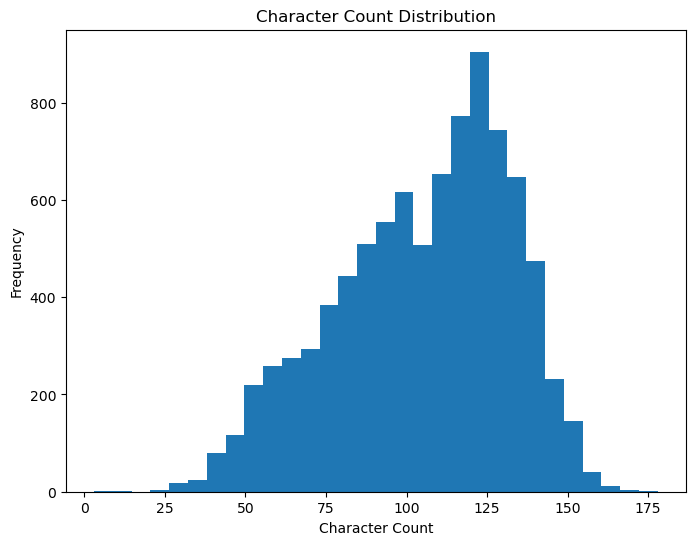

In [57]:
# Character Count
character_count = df['character_count']

plt.figure(figsize=(8, 6))
plt.hist(character_count, bins=30)
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.title('Character Count Distribution')
plt.show()

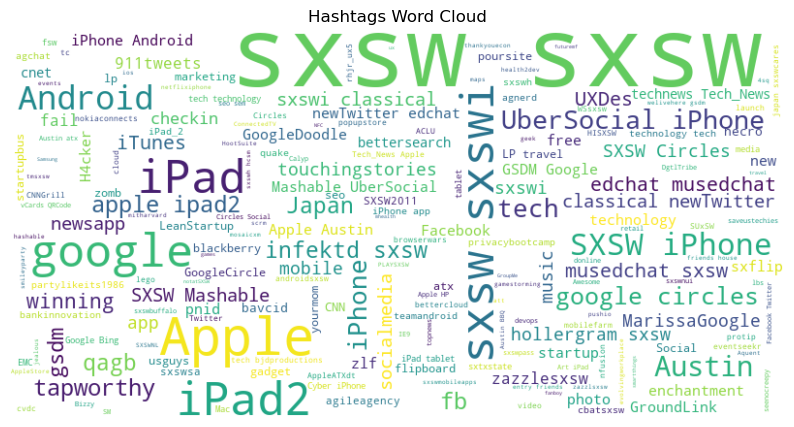

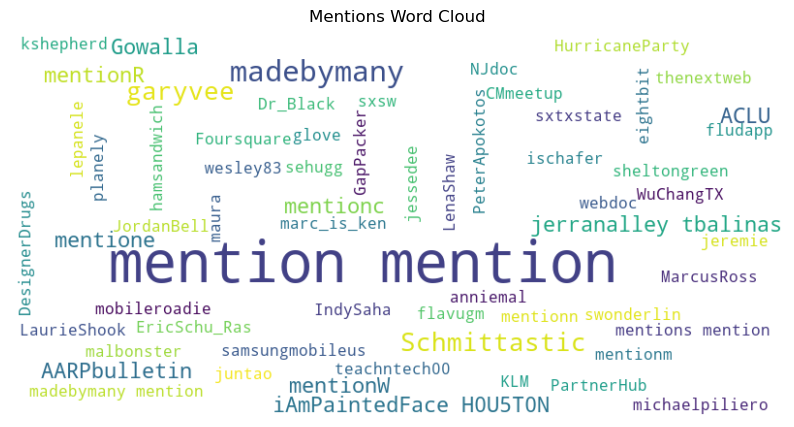

In [58]:
hashtags = df['hashtags']
mentions = df['mentions']

# Convert lists of hashtags and mentions to strings
hashtags_text = ' '.join([tag for tags in hashtags for tag in tags])
mentions_text = ' '.join([mention for mentions_list in mentions for mention in mentions_list])

# Word Cloud for Hashtags
hashtags_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags_text)

plt.figure(figsize=(10, 6))
plt.imshow(hashtags_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags Word Cloud')
plt.show()

# Word Cloud for Mentions
mentions_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(mentions_text)

plt.figure(figsize=(10, 6))
plt.imshow(mentions_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mentions Word Cloud')
plt.show()

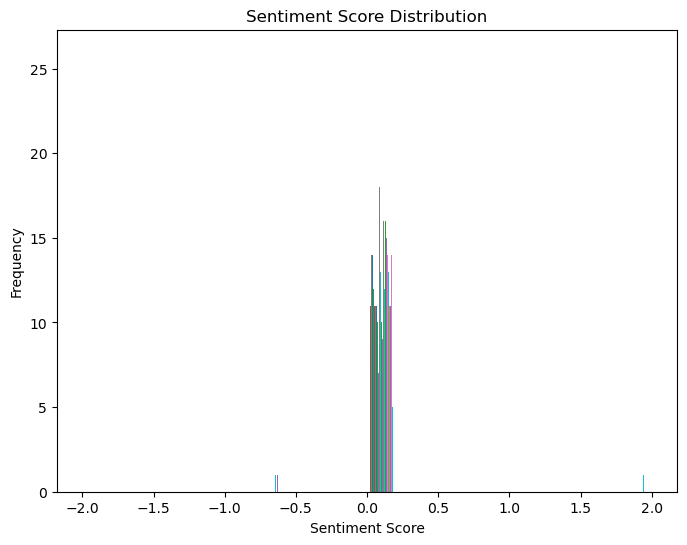

In [60]:
sentiment_scores = df['sentiment_scores']

plt.figure(figsize=(8, 6))
plt.hist(sentiment_scores, bins=20, range=(-2, 2))
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()

# Understand Vectorizor 
- Does this replace needing to clean the data (lowercase, ect)? Where does it fit in the overall model process?

# Step 1: Feature Engineering
- Before training a sentiment analysis model, it's important to engineer relevant features from your data. Some possible features you can consider are:

- Word frequency: Calculate the frequency of each word in the tweet text and add it as a feature.
- Character count: Count the number of characters in each tweet and add it as a feature.
- Hashtags and mentions: Extract hashtags and mentions from the tweets and add them as features.
- Sentiment lexicons: Utilize pre-built sentiment lexicons such as AFINN or SentiWordNet and assign sentiment scores to words in the tweets.

# Word Frequency:

 1) Calculate the frequency of each word in the tweet text: Count the occurrences of each word in the tweet and create a feature that represents the frequency of each word. Tools: You can use the Counter class from the Python collections module to count word frequencies.

2) Character Count: Count the number of characters in each tweet: Determine the length of each tweet in terms of the number of characters and add it as a feature. Tools: You can use the len() function in Python to calculate the length of each tweet.

3) Hashtags and Mentions: Extract hashtags and mentions from the tweets: Parse the tweet text to identify hashtags (words or phrases preceded by the '#' symbol) and mentions (usernames preceded by the '@' symbol). Add them as features: Create binary features indicating the presence or absence of specific hashtags or mentions in the tweet. Tools: You can use regular expressions (re module) in Python to extract hashtags and mentions from the tweet text.

4) Sentiment Lexicons: Utilize pre-built sentiment lexicons: Sentiment lexicons are dictionaries or databases that associate words with sentiment scores. They can help assign sentiment scores to individual words in the tweets. Assign sentiment scores: Look up each word in the tweet text in the sentiment lexicon and assign sentiment scores to those words. Tools: You can use pre-built sentiment lexicons such as AFINN (which assigns a sentiment score between -5 and +5 to words) or SentiWordNet (which provides sentiment scores based on WordNet synsets).

# Dummy Model
- Build a dummy model

# Step 2: Splitting the Data
- Split your dataset into training and testing sets. This will allow you to train your model on a portion of the data and evaluate its performance on unseen data. The commonly used split ratio is 80% for training and 20% for testing. You can use the train_test_split function from scikit-learn to perform the split.

# Step 3: Choosing a Model

- Select an appropriate machine learning model for sentiment analysis. Some popular choices are:

# Naive Bayes Classifier: It is simple and effective for text classification tasks.
- Support Vector Machines (SVM): It performs well in high-dimensional spaces and is often used for text classification.
- Recurrent Neural Networks (RNN) or Long Short-Term Memory (LSTM) networks: These models can capture the sequential nature of text data.

# Step 4: Model Training and Evaluation
- Train your selected model on the training set using the engineered features. Evaluate the performance of the trained model on the testing set. Common evaluation metrics for sentiment analysis include accuracy, precision, recall, and F1-score. You can use scikit-learn's fit() and predict() functions to train and evaluate the model.

# Step 5: Hyperparameter Tuning
- Optimize the performance of your model by tuning its hyperparameters. This involves trying different combinations of hyperparameters and selecting the ones that result in the best performance. You can use techniques like grid search or random search to find the optimal hyperparameters.

# Step 6: Model Deployment
- Once you have trained and fine-tuned your sentiment analysis model, you can deploy it to make predictions on new, unseen data. This can involve integrating the model into a web application, creating an API, or using it for real-time sentiment analysis.

# Word Frequency:

1) Calculate the frequency of each word in the tweet text: Count the occurrences of each word in the tweet and create a feature that represents the frequency of each word. Tools: You can use the Counter class from the Python collections module to count word frequencies.

2) Character Count: Count the number of characters in each tweet: Determine the length of each tweet in terms of the number of characters and add it as a feature. Tools: You can use the len() function in Python to calculate the length of each tweet.

3) Hashtags and Mentions: Extract hashtags and mentions from the tweets: Parse the tweet text to identify hashtags (words or phrases preceded by the '#' symbol) and mentions (usernames preceded by the '@' symbol). Add them as features: Create binary features indicating the presence or absence of specific hashtags or mentions in the tweet. Tools: You can use regular expressions (re module) in Python to extract hashtags and mentions from the tweet text.

4) Sentiment Lexicons: Utilize pre-built sentiment lexicons: Sentiment lexicons are dictionaries or databases that associate words with sentiment scores. They can help assign sentiment scores to individual words in the tweets. Assign sentiment scores: Look up each word in the tweet text in the sentiment lexicon and assign sentiment scores to those words. Tools: You can use pre-built sentiment lexicons such as AFINN (which assigns a sentiment score between -5 and +5 to words) or SentiWordNet (which provides sentiment scores based on WordNet synsets).

# 3) Natural Language Processing

## NLP Concepts

### Some Example Text

In [26]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 1: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [27]:
# call_on_students(1)



#### Answer:

- Lowercase (standardize case)
- Remove stopwords (really common words that likely have no semantic value)
- Stem or lemmatize to remove prefixes/suffixes/grammer bits
- Remove punctuation
- Tokenize

### 2: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [28]:
# call_on_students(1)

#### Answer:

- Columns: every word/token in the dataset/corpus
- Rows: the documents you're vectorizing


### 3: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [29]:
# call_on_students(1)

#### Answer:

- TF-IDF: term frequency inverse document frequency
- TF-IDF is a vectorizer that takes into account the rarity of the words


- TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that is used to evaluate the importance of a term in a document within a collection or corpus of documents.

- TF (Term Frequency) measures the frequency of a term within a document. It calculates the ratio of the number of times a term appears in a document to the total number of terms in that document. The intuition behind TF is that terms that appear more frequently in a document are more important to that document.

- IDF (Inverse Document Frequency) measures the rarity or uniqueness of a term across the entire corpus. It calculates the logarithm of the inverse ratio of the total number of documents in the corpus to the number of documents that contain the term. The intuition behind IDF is that terms that appear in a fewer number of documents are more informative and carry more weight in distinguishing between documents.

- TF-IDF is calculated by multiplying the TF and IDF values for each term in a document. The higher the TF-IDF score for a term in a document, the more important and relevant that term is to the document.

- TF-IDF is commonly used in natural language processing tasks, such as text classification, information retrieval, and text mining. It helps in identifying the most significant words or terms in a document and can be used to represent documents as numerical feature vectors for machine learning algorithms.


## NLP in Code

### Set Up

In [30]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

FileNotFoundError: [Errno 2] No such file or directory: 'data/2020_policies_feb_24.csv'

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [ ]:
policies.head()

The documents for activity are in the `policy` column, and the target is candidate. 

### 4: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [ ]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'])

In [ ]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instantiate it
vectorizer = CountVectorizer()

In [ ]:
# Fit it
vectorizer.fit(X_train)

### 5: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to transform train and test sets with the vectorizer
X_tr_vec = vectorizer.transform(X_train)
X_te_vec = vectorizer.transform(X_test)

In [ ]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_tr_vec, y_train)

In [ ]:
# Code here to evaluate your model on the test set
rfc.score(X_te_vec, y_test)

# 4) Clustering

## Clustering Concepts

### 1: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- You set the number of cluster centers (K) - algorithm randomly starts with that number of cluster centers (in random spots!)
- The algorithm calculates the distance between the centers and each observation and assigns the observation to the closest cluster center to create the first iteration of clusters
- The algorithm then takes all the observations assigned to each cluster, and moves that cluster center to be at the exact actual center (mean) of the newly created cluster
- Repeat! Until the cluster centers stop moving (or tolerance is met - some parameters in the implementation)

### 2: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- Inertia measures the distance between each point and its center - the idea is that better clusters are more tightly concentrated
- KMeans tries to minimize inertia when choosing cluster centers
- Method to evaluate - elbow plot! 

### 3: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- Silhouette score
- Difference between silhouette score and inertia: silhouette score tries to maximize similarity within groups and maximize distances between clusters, while inertia just looks within each cluster

## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.

### Set Up

In [ ]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 4: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- scale

In [ ]:
# call_on_students(1)

In [ ]:
# Code to preprocess the data
k_scaler = StandardScaler()

# Name the processed data X_processed
X_processed = k_scaler.fit_transform(X)

### 5: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [ ]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Instantiate
cluster = AgglomerativeClustering(n_clusters=2)
# Fit the object
cluster.fit(X_processed)

# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, cluster.labels_)

### 6: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [ ]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Create the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    
    # Fit the new clustering model
    cluster.fit(data)

    # Print the silhouette score
    print(silhouette_score(data, cluster.labels_))
    
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)